In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from pandas import ExcelFile

2. Load Data & Preprocessing Data

In [2]:

import pandas as pd

# mengarahkan dataset ke pandas untuk dibuka
file_path = '/content/sample_data/Banking Dataset.csv'

# Membaca file CSV menggunakan pandas
df = pd.read_csv(file_path, sep=';')

In [3]:
print("5 Data Teratas:")
print(df.head())

print("\n5 Data Terbawah:")
print(df.tail())

5 Data Teratas:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

5 Data Terbawah:
       age           job   marital  education default  balance housing loan  

In [4]:
# Tampilan ringkasan statistik
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Mengatasi Missing Values
imputer_num = SimpleImputer(strategy='median')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

# Mengisi missing values untuk kolom kategorikal dengan modus (nilai yang paling sering muncul)
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# 2. Encoding Kategori
# Menggunakan One-Hot Encoding untuk kolom kategorikal
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 3. Standarisasi Data Numerik
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Cek hasil setelah preprocessing
print(df.head())

        age   balance       day  duration  campaign     pdays  previous  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453  -0.25194   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453  -0.25194   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453  -0.25194   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453  -0.25194   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453  -0.25194   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False              True          False  ...      False   
3             True             False          False  ...      False   
4            False             False          False  ...      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False       True      False      False 

In [7]:
# Membuat DataFrame dari dataset
df = pd.DataFrame(df)


y_columns = [col for col in df.columns if col.startswith('y_')]

if y_columns:
    y = df[y_columns[0]]
    X = df.drop(columns=y_columns)
else:

    try:
        X = df.drop(columns=['y'])
        y = df['y']
    except KeyError:
        print("Error: Target variable 'y' not found in DataFrame. Please check your data preprocessing steps.")


# Menampilkan hasil pemisahan
print("Fitur (X):")
print(X)
print("\nTarget (y):")
print(y)

Fitur (X):
            age   balance       day  duration  campaign     pdays  previous  \
0      1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453 -0.251940   
1      0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453 -0.251940   
2     -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453 -0.251940   
3      0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453 -0.251940   
4     -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453 -0.251940   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.947747 -0.176460  0.143418  2.791329  0.076230 -0.411453 -0.251940   
45207  2.831227  0.120447  0.143418  0.768224 -0.246560 -0.411453 -0.251940   
45208  2.925401  1.429593  0.143418  3.373797  0.721811  1.436189  1.050473   
45209  1.512791 -0.228024  0.143418  0.970146  0.399020 -0.411453 -0.251940   
45210 -0.370689  0.528364  0.143418  0.399328 -0.246560  1.476138  4.523577   

       job_blue-collar  job_entrepreneur

3. Pembuatan Model

In [8]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi tentang data pelatihan dan pengujian
print("Data Pelatihan (X_train, y_train):", X_train.shape, y_train.shape)
print("Data Pengujian (X_test, y_test):", X_test.shape, y_test.shape)

Data Pelatihan (X_train, y_train): (36168, 42) (36168,)
Data Pengujian (X_test, y_test): (9043, 42) (9043,)


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8788 - loss: 0.7593 - val_accuracy: 0.8872 - val_loss: 0.5597
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8903 - loss: 0.5353 - val_accuracy: 0.8958 - val_loss: 0.4538
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8928 - loss: 0.4392 - val_accuracy: 0.8977 - val_loss: 0.3857
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8937 - loss: 0.3798 - val_accuracy: 0.9006 - val_loss: 0.3390
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8963 - loss: 0.3334 - val_accuracy: 0.9025 - val_loss: 0.3062
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9015 - loss: 0.2991 - val_accuracy: 0.9039 - val_loss: 0.2833
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8993 - loss: 0.2789 - val_accuracy: 0.9046 - val_loss: 0.2666
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9023 - loss: 0.2633 - val_accu

Grafik

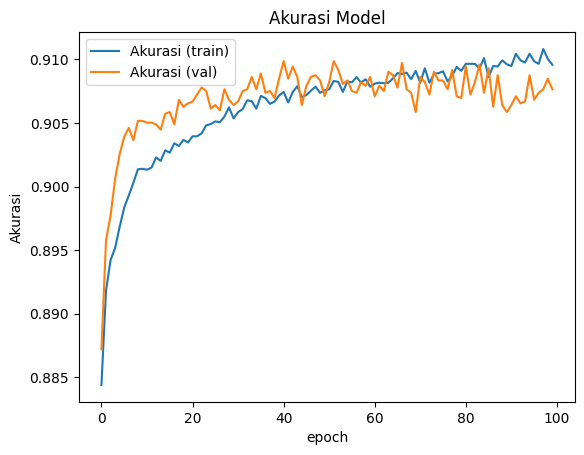

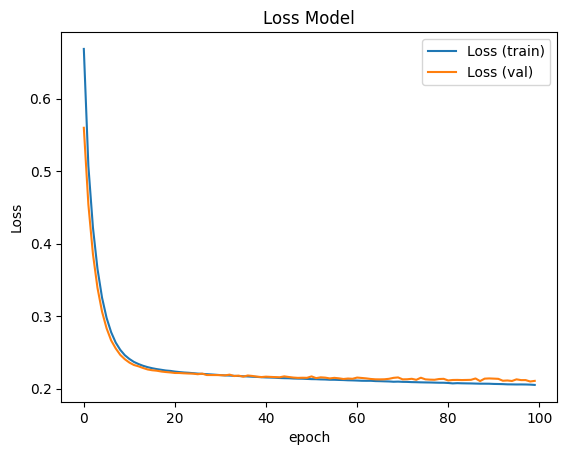

In [10]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Akurasi (train)')
plt.plot(history.history['val_accuracy'], label='Akurasi (val)')
plt.title('Akurasi Model')
plt.xlabel('epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Loss Model')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Evaluasi

In [11]:
# Prediksi pada data uji
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Tampilkan classification report
print(classification_report(y_test, y_pred))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7952
        True       0.66      0.44      0.52      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.70      0.74      9043
weighted avg       0.89      0.90      0.90      9043

